## Importing Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [3]:
raw = pd.read_csv('../input/hmeq-data/hmeq.csv')
raw.sample(8)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
327,1,6000,NaN,95500.0,HomeImp,Mgr,6.0,1.0,2.0,129.900000,1.0,22.0,NaN
5890,0,58900,40100.0,70672.0,DebtCon,Other,3.0,0.0,0.0,112.319514,0.0,20.0,30.388431
4637,0,24300,42276.0,68775.0,DebtCon,Other,24.0,0.0,0.0,309.683586,2.0,31.0,32.746507
943,0,9100,24721.0,34462.0,DebtCon,Other,1.0,0.0,0.0,28.100520,9.0,7.0,27.520682
2837,0,15800,NaN,96642.0,DebtCon,Office,26.0,0.0,0.0,335.154688,0.0,16.0,12.706938
4886,0,25600,76102.0,119391.0,DebtCon,Other,5.0,0.0,0.0,87.625382,1.0,32.0,40.929954
3396,0,18000,90000.0,120600.0,DebtCon,Office,25.0,0.0,0.0,272.933333,3.0,17.0,NaN
3493,0,18400,40673.0,60418.0,HomeImp,Other,27.0,0.0,0.0,247.649579,0.0,13.0,24.980299


In [4]:
raw.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
raw.shape

(5960, 13)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
#Persentase data missing tiap kolom 
raw.isna().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [ ]:
cols=['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
missres={'col1':[],
         'col2':[],
         'count':[]}
for col1 in cols:
    cols.remove(col1)
    for col2 in cols:
        miss=raw.loc[raw[col1].isna() & raw[col2].isna()].shape[0]
        missres['col1'].append(col1)
        missres['col2'].append(col2)
        missres['count'].append(miss)
pd.DataFrame(missres).groupby('col1').max()

In [8]:
#Drop row dengan 5 data missing atau lebih
misscols = ['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
df = raw.dropna(subset=misscols, thresh=5, axis='rows')
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     441
VALUE        95
REASON      167
JOB         174
YOJ         408
DEROG       582
DELINQ      454
CLAGE       182
NINQ        384
CLNO         96
DEBTINC    1228
dtype: int64

In [9]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5834.000000,5834.000000,5393.000000,5739.000000,5426.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4606.000000
mean,0.199006,18724.494344,73897.201780,102106.123286,8.914062,0.254570,0.449442,179.766275,1.186055,21.296096,33.896005
std,0.399287,11257.210956,44539.074735,57635.358066,7.572245,0.846047,1.127266,85.810092,1.728675,10.138933,8.543100
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11200.000000,46380.000000,66208.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.237047
50%,0.000000,16400.000000,65030.000000,89609.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.888239
75%,0.000000,23500.000000,91683.000000,119798.500000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.076554
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [85]:
#Imputasi data dengan median dan modus
numcols=['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DELINQ','DEROG','CLAGE', 'NINQ','CLNO','DEBTINC']
for col in numcols:
    df[col].fillna(df[col].median(),inplace=True)
    
catcols= ['REASON','JOB']
for col in catcols:
    df[col].fillna(df[col].mode()[0],inplace=True)

df.isna().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [11]:
#Pemeriksaan data duplikat
df.duplicated().sum()

0

In [12]:
#handle outlier menggunakan zscore
from scipy import stats

print(f"jumlah baris sebelum difilter: {len(df)}")

filtered_entries = np.array([True] * len(df))
for col in numcols:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3) & filtered_entries
df1 = df[filtered_entries]


print(f"jumlah baris setelah difilter: {len(df1)}")

jumlah baris sebelum difilter: 5834
jumlah baris setelah difilter: 5119


In [13]:
data=pd.get_dummies(df1)
data

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.888239,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.888239,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.888239,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.888239,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,0,52200,65030.0,90240.0,7.0,0.0,0.0,341.828812,0.0,7.0,24.016671,0,1,0,0,1,0,0,0
5863,0,52200,41301.0,67400.0,5.0,1.0,0.0,181.502354,1.0,15.0,30.626188,1,0,0,1,0,0,0,0
5864,0,52200,65030.0,81115.0,10.0,0.0,0.0,173.214284,1.0,21.0,24.981883,0,1,0,0,0,0,0,1
5865,0,52300,65030.0,84584.0,7.0,1.0,0.0,350.920996,0.0,7.0,24.355304,0,1,0,0,1,0,0,0


## EDA

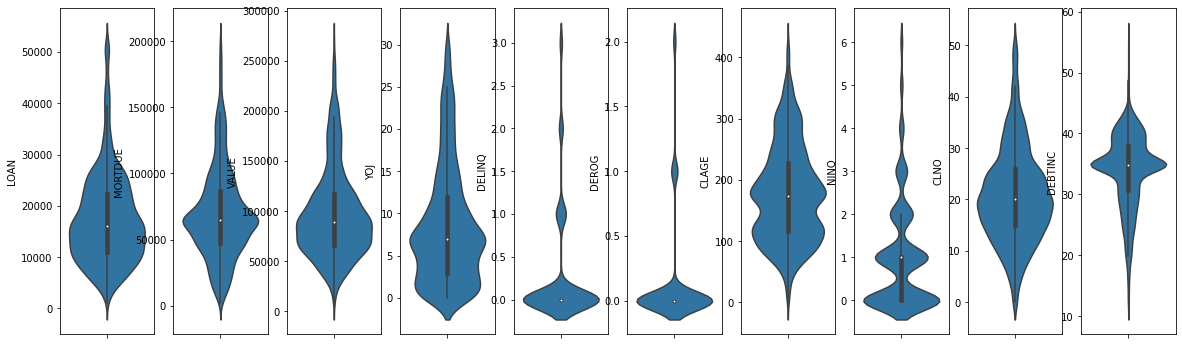

In [14]:
plt.figure(figsize=(20,6))

i=1
for col in numcols:
    plt.subplot(1,len(numcols),i)
    sns.violinplot(y=data[col])
    i+=1
plt.show()

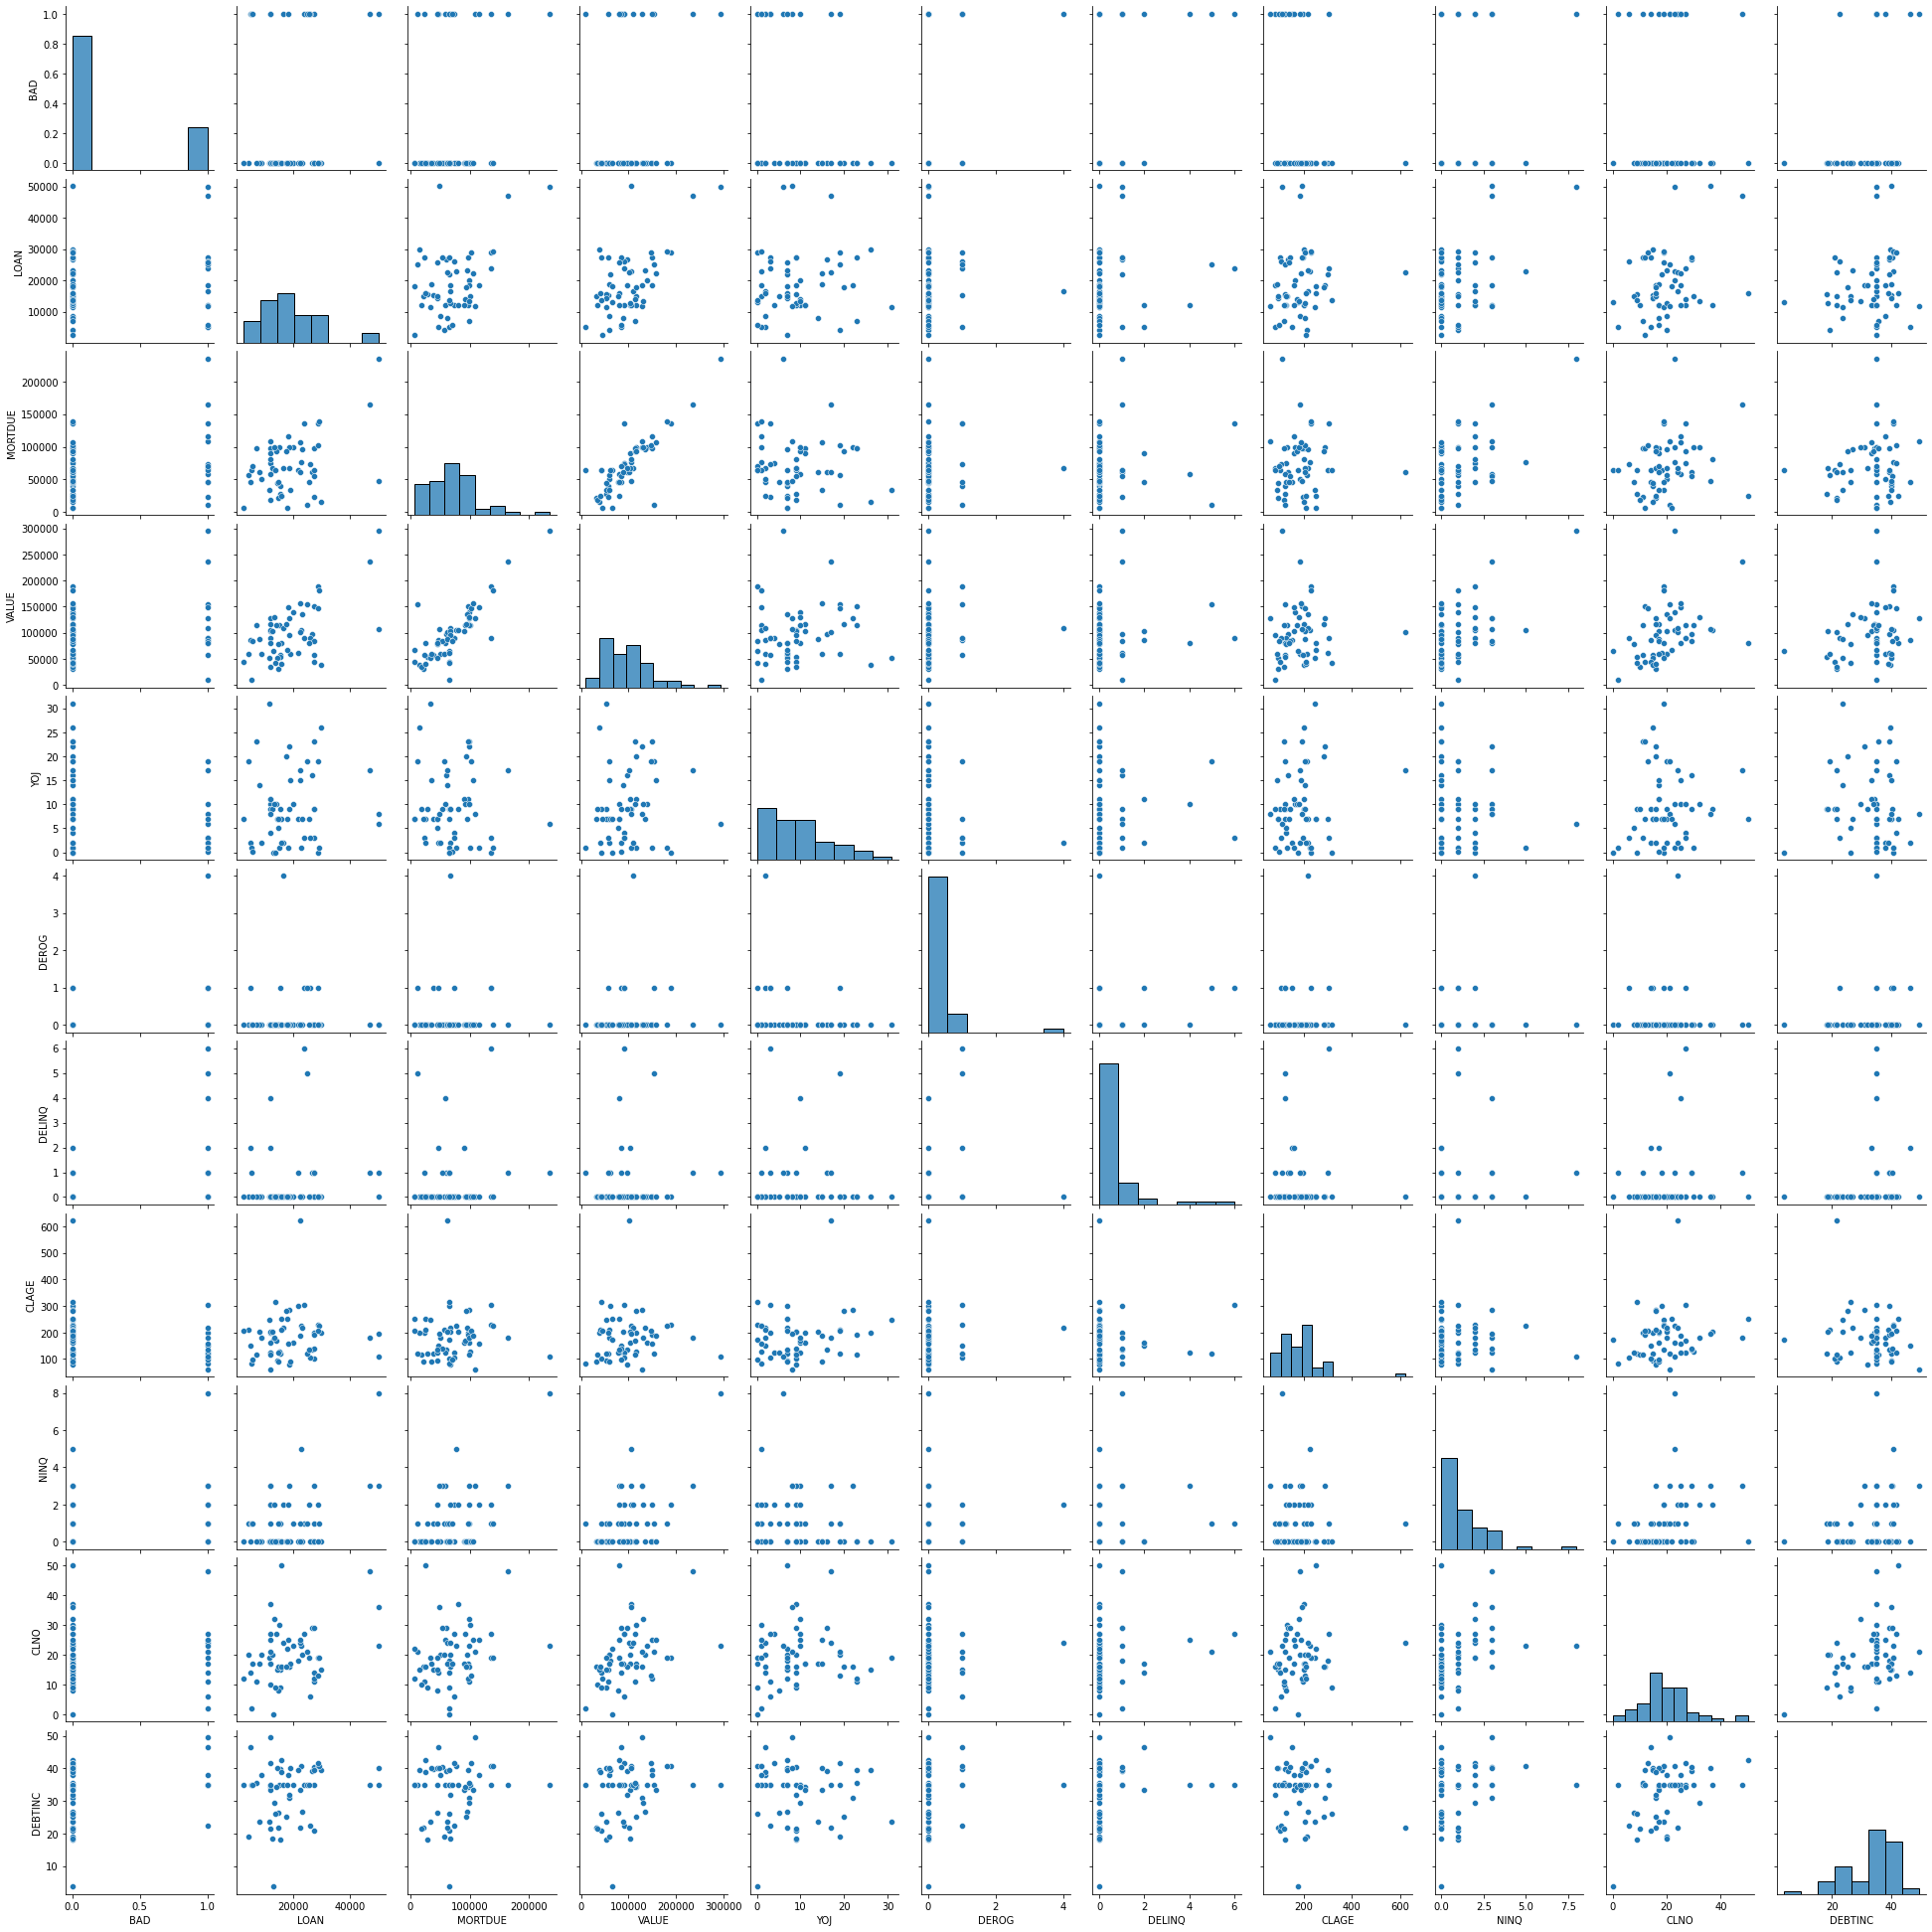

In [89]:
sns.pairplot(df.sample(frac=0.01))

<AxesSubplot:>

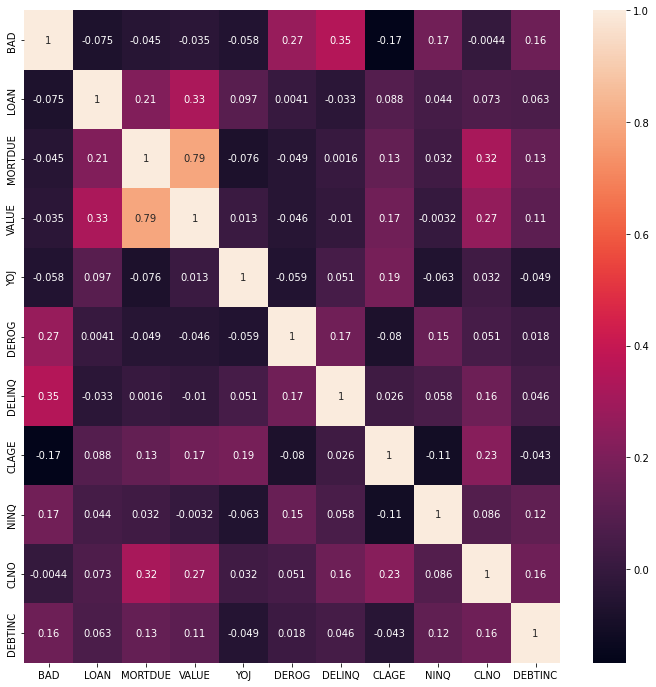

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

## ML Preparation

In [17]:
x=data.drop('BAD',axis='columns')
y=data['BAD']
print(x.shape, y.shape)

(5119, 18) (5119,)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import QuantileTransformer

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

pipe= Pipeline([
    ('scale', QuantileTransformer()),
    ('model', LogisticRegression())
])

pipe.get_params()

{'memory': None,
 'steps': [('scale', QuantileTransformer()), ('model', LogisticRegression())],
 'verbose': False,
 'scale': QuantileTransformer(),
 'model': LogisticRegression(),
 'scale__copy': True,
 'scale__ignore_implicit_zeros': False,
 'scale__n_quantiles': 1000,
 'scale__output_distribution': 'uniform',
 'scale__random_state': None,
 'scale__subsample': 100000,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [72]:
param=dict(model__C=[0.01,0.1,1.0,10.0,100.0])

grid_search=GridSearchCV(estimator=pipe,
                         param_grid=param,
                         scoring='accuracy',
                         cv=5,
                         error_score=0)
grid_search.fit(x, y)

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='accuracy')

In [73]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083726,0.015458,0.008367,0.000675,0.01,{'model__C': 0.01},0.837891,0.836914,0.836914,0.836914,0.836755,0.837077,0.000411,1
1,0.111199,0.001067,0.008927,0.000444,0.1,{'model__C': 0.1},0.825195,0.845703,0.825195,0.844727,0.837732,0.835710,0.009015,2
2,0.123053,0.001338,0.008736,0.000136,1.0,{'model__C': 1.0},0.819336,0.841797,0.831055,0.845703,0.834800,0.834538,0.009172,3
3,0.130522,0.006885,0.008712,0.000224,10.0,{'model__C': 10.0},0.815430,0.840820,0.833008,0.845703,0.833822,0.833757,0.010286,5
4,0.113456,0.001695,0.009015,0.000314,100.0,{'model__C': 100.0},0.816406,0.840820,0.833008,0.845703,0.833822,0.833952,0.009940,4


In [74]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier
pipe2= Pipeline([
    ('scale', QuantileTransformer()),
    ('model', DecisionTreeClassifier())
])
pipe2.fit(x_train,y_train)
y_pred=pipe2.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


cm = confusion_matrix(y_test, y_pred)

print(cm)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))

[[801  50]
 [ 72 101]]
0.880859375
[0.94124559 0.58381503]
[0.91752577 0.66887417]


<AxesSubplot:>

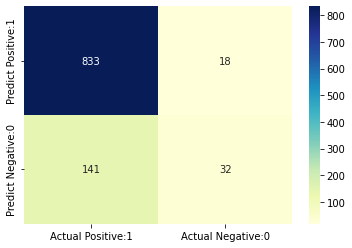

In [76]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853484,0.625000,0.842773,0.739242,0.814882
recall,0.978848,0.173410,0.842773,0.576129,0.842773
f1-score,0.911877,0.271493,0.842773,0.591685,0.803687
support,851.000000,173.000000,0.842773,1024.000000,1024.000000
